# Import Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_path = 'film.csv'
data_film = pd.read_csv(data_path)
data_film

,title,year,genre,users_rating,votes,languages,directors,runtime
0,#FriendButMarried 2,2020,Biography,6.5,120,Indonesian,Rako Prijanto,100 min
1,4 Mantan,2020,Thriller,6.4,8,Indonesian,Hanny Saputra,80 min
2,Aku Tahu Kapan Kamu Mati,2020,Horror,5.4,17,Indonesian,Hadrah Daeng Ratu,92 min
3,Anak Garuda,2020,Adventure,9.1,27,Indonesian,Faozan Rizal,129 min
4,Dignitate,2020,Drama,7.6,33,Indonesian,Fajar Nugros,109 min
...,...,...,...,...,...,...,...,...
1267,The Tiger from Tjampa,1953,Drama,6.4,30,Indonesian,D. Djajakusuma,97 min
1268,Enam Djam di Djogja,1951,Drama,6.3,9,Indonesian,Usmar Ismail,116 min
1269,Darah dan Doa,1950,Drama,6.6,27,Indonesian,Usmar Ismail,150 min
1270,Resia Boroboedoer,1928,Adventure,7.0,8,Indonesian,NaN,NaN


# Pembersihan data

Melihat Semua kolom yang ada pada dataset

In [ ]:
for i in data_film.columns:
  print(i)

title
year
genre
users_rating
votes
languages
directors
runtime


Mencari kolom-kolom yang mengandung nilai NaN

In [ ]:
is_na = data_film.isna().any(axis=0)
is_na

title           False
year            False
genre            True
users_rating    False
votes           False
languages       False
directors        True
runtime          True
dtype: bool

Menghapus baris data yang tidak akan digunakan

In [ ]:
is_na = data_film.isna().any(axis=1)
is_na
data_film.loc[is_na]

,title,year,genre,users_rating,votes,languages,directors,runtime
21,#MoveOnAja,2019,Comedy,6.3,6,Indonesian,Hestu Saputra,NaN
67,Kutuk,2019,Horror,6.4,18,Indonesian,Rudi Aryanto,NaN
72,Lorong,2019,Horror,5.4,14,Indonesian,Hestu Saputra,NaN
91,Pintu Merah,2019,Horror,6.3,9,Indonesian,Noviandra Santosa,NaN
121,The Santri,2019,Adventure,3.9,10,Indonesian,Ken Zheng,NaN
...,...,...,...,...,...,...,...,...
1255,Intan Perawan Kubu,1972,Adventure,7.4,7,Indonesian,NaN,NaN
1256,Si Doel Anak Betawi,1972,Drama,7.7,20,Indonesian,Sjuman Djaya,NaN
1258,Malin Kundang,1971,NaN,7.1,7,Indonesian,D. Djajakusuma,NaN
1261,Operation Kalimantan,1962,Action,5.8,8,Indonesian,Vladimír Sís,NaN


Mengganti nilai NaN pada dataset menggunakan nilai setelahnya

In [ ]:
print(data_film)
is_na = data_film[data_film.isnull().any(axis=1)].index
replaced_data_film  = data_film.fillna(method='bfill')
print(replaced_data_film.iloc[is_na]) 

                         title  year      genre  users_rating votes  \
0          #FriendButMarried 2  2020  Biography           6.5   120   
1                     4 Mantan  2020   Thriller           6.4     8   
2     Aku Tahu Kapan Kamu Mati  2020     Horror           5.4    17   
3                  Anak Garuda  2020  Adventure           9.1    27   
4                    Dignitate  2020      Drama           7.6    33   
...                        ...   ...        ...           ...   ...   
1267     The Tiger from Tjampa  1953      Drama           6.4    30   
1268       Enam Djam di Djogja  1951      Drama           6.3     9   
1269             Darah dan Doa  1950      Drama           6.6    27   
1270         Resia Boroboedoer  1928  Adventure           7.0     8   
1271        Loetoeng Kasaroeng  1926    Fantasy           7.2    11   

       languages          directors  runtime  
0     Indonesian      Rako Prijanto  100 min  
1     Indonesian      Hanny Saputra   80 min  
2     

Sehingga, setelah di hapus menggunakan metode **bfill** maka akan di dapatkan data baru sebagai berikut.

In [ ]:
new_data = replaced_data_film.iloc[is_na]
new_data

,title,year,genre,users_rating,votes,languages,directors,runtime
21,#MoveOnAja,2019,Comedy,6.3,6,Indonesian,Hestu Saputra,112 min
67,Kutuk,2019,Horror,6.4,18,Indonesian,Rudi Aryanto,108 min
72,Lorong,2019,Horror,5.4,14,Indonesian,Hestu Saputra,86 min
91,Pintu Merah,2019,Horror,6.3,9,Indonesian,Noviandra Santosa,90 min
121,The Santri,2019,Adventure,3.9,10,Indonesian,Ken Zheng,94 min
...,...,...,...,...,...,...,...,...
1255,Intan Perawan Kubu,1972,Adventure,7.4,7,Indonesian,Sjuman Djaya,110 min
1256,Si Doel Anak Betawi,1972,Drama,7.7,20,Indonesian,Sjuman Djaya,110 min
1258,Malin Kundang,1971,Drama,7.1,7,Indonesian,D. Djajakusuma,117 min
1261,Operation Kalimantan,1962,Action,5.8,8,Indonesian,Vladimír Sís,152 min


Langkah terakhir, adalah **Menghapus Data Duplicate.** Menggunakan method bawaan dari pandas .drop_duplicates

In [ ]:
data_film_duplicated_free = new_data.drop_duplicates()

In [ ]:
data_film_duplicated_free

,title,year,genre,users_rating,votes,languages,directors,runtime
21,#MoveOnAja,2019,Comedy,6.3,6,Indonesian,Hestu Saputra,112 min
67,Kutuk,2019,Horror,6.4,18,Indonesian,Rudi Aryanto,108 min
72,Lorong,2019,Horror,5.4,14,Indonesian,Hestu Saputra,86 min
91,Pintu Merah,2019,Horror,6.3,9,Indonesian,Noviandra Santosa,90 min
121,The Santri,2019,Adventure,3.9,10,Indonesian,Ken Zheng,94 min
...,...,...,...,...,...,...,...,...
1255,Intan Perawan Kubu,1972,Adventure,7.4,7,Indonesian,Sjuman Djaya,110 min
1256,Si Doel Anak Betawi,1972,Drama,7.7,20,Indonesian,Sjuman Djaya,110 min
1258,Malin Kundang,1971,Drama,7.1,7,Indonesian,D. Djajakusuma,117 min
1261,Operation Kalimantan,1962,Action,5.8,8,Indonesian,Vladimír Sís,152 min


Pengecekan data null apakah sudah terhapus semua

In [ ]:
is_na = data_film_duplicated_free.isna().any(axis=0)
is_na

title           False
year            False
genre           False
users_rating    False
votes           False
languages       False
directors       False
runtime         False
dtype: bool

# **Analisis Statistik**

Mencari mean dari dataset

In [ ]:
data_film_duplicated_free.mean()

<ipython-input-10-f1e31b57bc5c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_film_duplicated_free.mean()


year            2002.969048
users_rating       6.176429
dtype: float64

Mencari median atau nilai tengah dari data set

In [ ]:
data_film_duplicated_free.median()

<ipython-input-11-5d47ca108a5a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_film_duplicated_free.median()


year            2008.0
users_rating       6.3
dtype: float64

Mencari modus

In [ ]:
data_film_duplicated_free.mode

<bound method DataFrame.mode of                      title  year      genre  users_rating votes   languages  \
21              #MoveOnAja  2019     Comedy           6.3     6  Indonesian   
67                   Kutuk  2019     Horror           6.4    18  Indonesian   
72                  Lorong  2019     Horror           5.4    14  Indonesian   
91             Pintu Merah  2019     Horror           6.3     9  Indonesian   
121             The Santri  2019  Adventure           3.9    10  Indonesian   
...                    ...   ...        ...           ...   ...         ...   
1255    Intan Perawan Kubu  1972  Adventure           7.4     7  Indonesian   
1256   Si Doel Anak Betawi  1972      Drama           7.7    20  Indonesian   
1258         Malin Kundang  1971      Drama           7.1     7  Indonesian   
1261  Operation Kalimantan  1962     Action           5.8     8  Indonesian   
1270     Resia Boroboedoer  1928  Adventure           7.0     8  Indonesian   

              direc

Mencari Varian

In [ ]:
data_film_duplicated_free.var()

<ipython-input-13-c19e12366e61>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_film_duplicated_free.var()


year            178.936987
users_rating      1.764527
dtype: float64

Mencari Standar Deviasi

In [ ]:
data_film_duplicated_free.std()

<ipython-input-14-f402ad12cc04>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_film_duplicated_free.std()


year            13.376733
users_rating     1.328355
dtype: float64

Mencari Describe 

In [ ]:
data_film.describe()

,year,users_rating
count,1272.000000,1272.000000
mean,2007.023585,6.144418
std,12.968560,1.389315
min,1926.000000,1.200000
25%,2006.000000,5.300000
50%,2011.000000,6.400000
75%,2016.000000,7.100000
max,2020.000000,9.400000


# Visualisasi Data

1. Visualisasi genre

In [ ]:
data_film_duplicated_free

,title,year,genre,users_rating,votes,languages,directors,runtime
21,#MoveOnAja,2019,Comedy,6.3,6,Indonesian,Hestu Saputra,112 min
67,Kutuk,2019,Horror,6.4,18,Indonesian,Rudi Aryanto,108 min
72,Lorong,2019,Horror,5.4,14,Indonesian,Hestu Saputra,86 min
91,Pintu Merah,2019,Horror,6.3,9,Indonesian,Noviandra Santosa,90 min
121,The Santri,2019,Adventure,3.9,10,Indonesian,Ken Zheng,94 min
...,...,...,...,...,...,...,...,...
1255,Intan Perawan Kubu,1972,Adventure,7.4,7,Indonesian,Sjuman Djaya,110 min
1256,Si Doel Anak Betawi,1972,Drama,7.7,20,Indonesian,Sjuman Djaya,110 min
1258,Malin Kundang,1971,Drama,7.1,7,Indonesian,D. Djajakusuma,117 min
1261,Operation Kalimantan,1962,Action,5.8,8,Indonesian,Vladimír Sís,152 min


Mengubah value kolom genre menjadi int

In [ ]:
code = 1
for i in data_film_duplicated_free.loc[:,'genre'].unique():
  data_film_duplicated_free['genre'].loc[data_film_duplicated_free['genre']==i] = code
  code += 1
data_film_duplicated_free['genre'] = data_film_duplicated_free['genre'].astype('int64')

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
data_film_duplicated_free

,title,year,genre,users_rating,votes,languages,directors,runtime
21,#MoveOnAja,2019,1,6.3,6,Indonesian,Hestu Saputra,112 min
67,Kutuk,2019,2,6.4,18,Indonesian,Rudi Aryanto,108 min
72,Lorong,2019,2,5.4,14,Indonesian,Hestu Saputra,86 min
91,Pintu Merah,2019,2,6.3,9,Indonesian,Noviandra Santosa,90 min
121,The Santri,2019,3,3.9,10,Indonesian,Ken Zheng,94 min
...,...,...,...,...,...,...,...,...
1255,Intan Perawan Kubu,1972,3,7.4,7,Indonesian,Sjuman Djaya,110 min
1256,Si Doel Anak Betawi,1972,6,7.7,20,Indonesian,Sjuman Djaya,110 min
1258,Malin Kundang,1971,6,7.1,7,Indonesian,D. Djajakusuma,117 min
1261,Operation Kalimantan,1962,4,5.8,8,Indonesian,Vladimír Sís,152 min


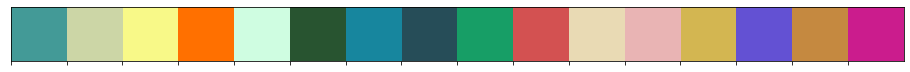

In [ ]:
colors_mix = ['#439A97','#CCD6A6', '#F8F988', '#FF7000', '#CFFDE1', '#285430',"#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3', '#C58940', '#CB1C8D']
sns.palplot(colors_mix)

Genre
1. 

In [ ]:
comedy = data_film_duplicated_free.loc[data_film_duplicated_free.genre == 1, 'genre'].count()
horror = data_film_duplicated_free.loc[data_film_duplicated_free.genre == 2, 'genre'].count()
adventure = data_film_duplicated_free.loc[data_film_duplicated_free.genre == 3, 'genre'].count()
action = data_film_duplicated_free.loc[data_film_duplicated_free.genre == 4, 'genre'].count()
biography = data_film_duplicated_free.loc[data_film_duplicated_free.genre == 5, 'genre'].count()
drama = data_film_duplicated_free.loc[data_film_duplicated_free.genre == 6, 'genre'].count()
animation	= data_film_duplicated_free.loc[data_film_duplicated_free.genre ==7, 'genre'].count()
sci_fi = data_film_duplicated_free.loc[data_film_duplicated_free.genre == 8, 'genre'].count()
romance = data_film_duplicated_free.loc[data_film_duplicated_free.genre == 9, 'genre'].count()
thriller = data_film_duplicated_free.loc[data_film_duplicated_free.genre == 10, 'genre'].count()
crime = data_film_duplicated_free.loc[data_film_duplicated_free.genre == 11, 'genre'].count()
war = data_film_duplicated_free.loc[data_film_duplicated_free.genre == 12, 'genre'].count()
fantasy = data_film_duplicated_free.loc[data_film_duplicated_free.genre == 13, 'genre'].count()

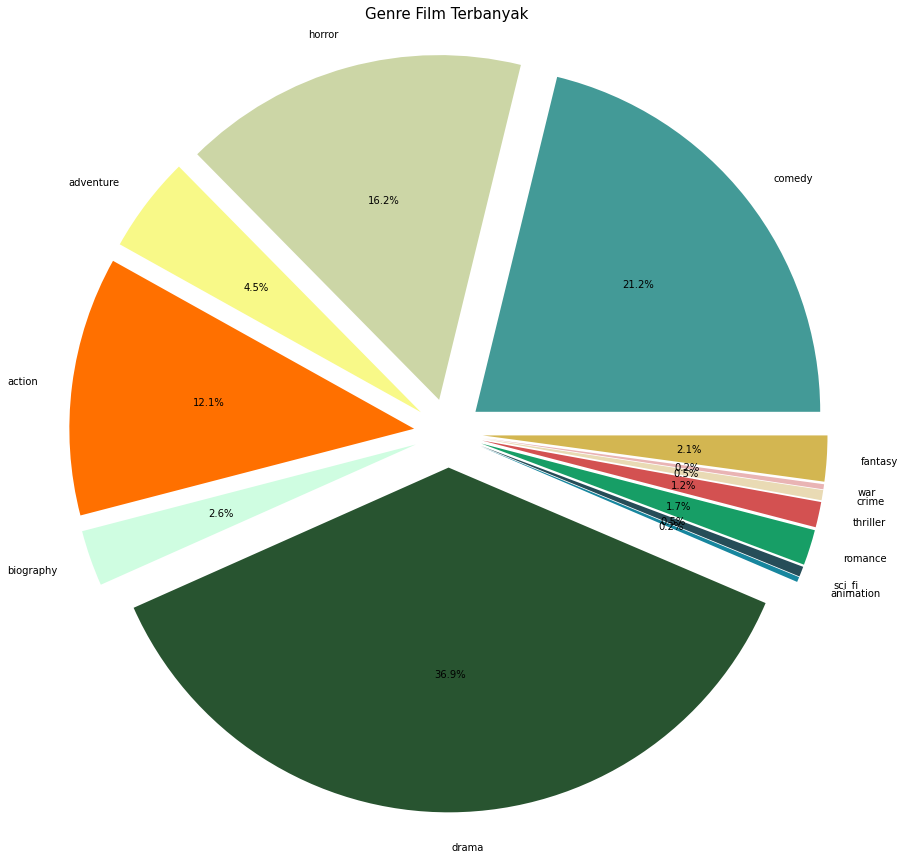

In [ ]:
labels = ['comedy', 'horror', 'adventure', 'action', 'biography', 'drama', 'animation' , 'sci_fi', 'romance', 'thriller', 'crime', 'war', 'fantasy']
sizes = [comedy, horror, adventure, action, biography, drama, animation, sci_fi, romance, thriller, crime, war, fantasy]
colors = ['#439A97','#CCD6A6', '#F8F988', '#FF7000', '#CFFDE1', '#285430',"#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651']
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

plt.title("Genre Film Terbanyak", fontsize=15)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.rcParams["figure.figsize"] = (25,15)
plt.rcParams['font.size'] = 10.0
plt.show()

genre

In [ ]:
rata_rata = data_film_duplicated_free.groupby('genre')['users_rating'].mean()
rata_rata

genre
1     5.849438
2     5.186765
3     6.368421
4     6.264706
5     7.363636
6     6.659355
7     6.400000
8     5.800000
9     7.042857
10    6.100000
11    5.950000
12    6.900000
13    5.611111
Name: users_rating, dtype: float64

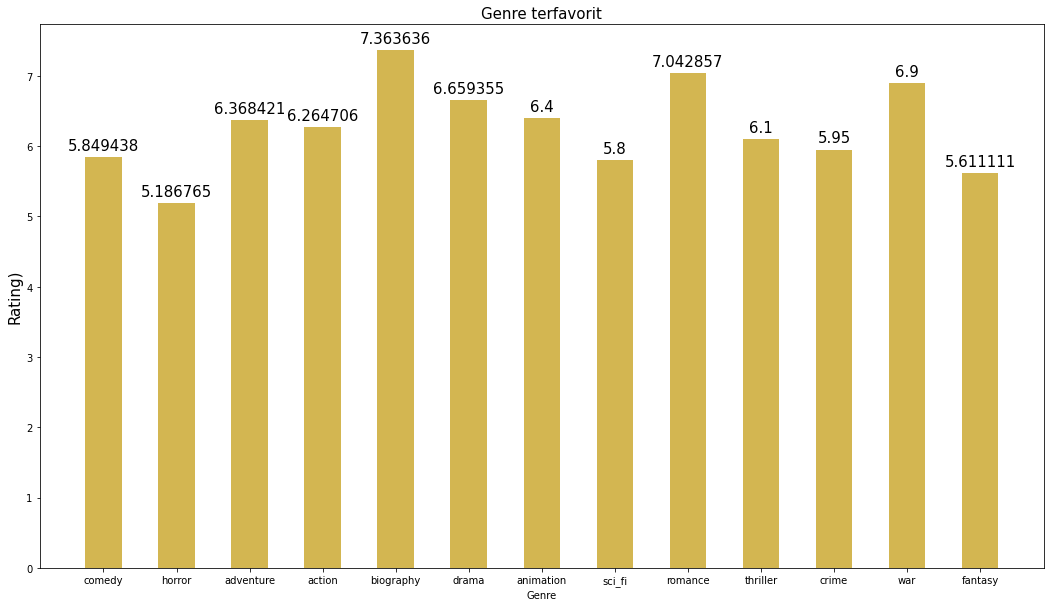

In [ ]:
menMeans = (5.849438, 5.186765, 6.368421, 6.264706, 7.363636, 6.659355, 6.400000, 5.800000, 7.042857, 6.100000, 5.950000, 6.900000, 5.611111) 
comedy = rata_rata[1]
horror = rata_rata[2]
adventure	= rata_rata[3]
action = rata_rata[4]
biography = rata_rata[5]
drama = rata_rata[6]
animation = rata_rata[7]
sci_fi = rata_rata[8]
romance = rata_rata[9]
thriller = rata_rata[10]
crime = rata_rata[11]
war = rata_rata[12]
fantasy = rata_rata[13]
data_dict = {'comedy':comedy, 'horror':horror, 'adventure':adventure, 'action':action, 'biography':biography, 'drama':drama, 
             'animation':animation, 'sci_fi':sci_fi, 'romance':romance, 'thriller':thriller, 'crime':crime, 'war':war,'fantasy':fantasy }
courses = list(data_dict.keys())
values = list(data_dict.values())
fig, ax = plt.subplots(figsize = (18,10))
for index,data in enumerate(menMeans):
    plt.text(x=index , y =data+0.1 , s=f"{data}" , fontdict=dict(fontsize=15), ha='center')

#  Bar plot
plt.bar(courses, values, color ='#D3B651', width = 0.5)
plt.xlabel("Genre")
plt.ylabel("Rating)", fontsize=15)
plt.title("Genre terfavorit", fontsize=15)
plt.show()